In [1]:
class Planet:
    
    def __init__(self, name, host_name, orbital_period = 0, semimajor_axis = 0, planet_radius = 0, eccentricity = 0.1, host_solar_radius = 0):
        '''
        atributes:

            name: name of the planet
            host_name: name of the host star
            orbital_period: orbital period of the planet in days
            semimajor_axis: semimajor axis of the planet in AU
            planet_radius: radius of the planet in earth radii
            ecentricity: ecentricity of the orbit (a numbe between 0 and 1, 0 being more circular)
            host_solar_radius: solar radius of the host star in solar radii

            habitability: either likely, not likely, or possibly depending on if the planet has an atmosphere
            orbit: an equation for an elipse that is the orbit of the planet

        methods:

            set/get for all atributes

            set_habitability: used in the sun class to set the planets habitability
            get_habitability: gives the habitability of the planet

            get_orbit: returns an equation that can be used to map the planet's orbit

        '''
    
        self.name = name
        self.host_name = host_name
        self.orbital_period = orbital_period
        self.semimajor_axis = semimajor_axis
        self.planet_radius = planet_radius
        self.eccentricity = eccentricity 
        self.host_solar_radius = host_solar_radius
        
        import numpy as np
    
    def set_name(self, name):
        self.name = name
        
    def set_host_name(self, host_name):
        self.host_name = host_name
        
    def set_orbital_period(self, orbital_period):
        self.orbital_period = orbital_period
        
    def set_semimajor_axis(self, semimajor_axis):
        self.semimajor_axis = semimajor_axis
        
    def set_planet_radius(self, planet_radius):
        self.planet_radius = planet_radius
        
    def set_eccentricity(self, eccentricity):
        self.eccentricity = eccentricity
        
    def set_host_solar_radius(self, host_solar_radius):
        self.host_solar_radius = host_solar_radius
        
    def get_name(self):
        return self.name
        
    def get_host_name(self):
        return self.host_name
        
    def get_orbital_period(self):
        return self.orbital_period
        
    def get_semimajor_axis(self):
        return self.semimajor_axis
        
    def get_planet_radius(self):
        return self.planet_radius
        
    def get_eccentricity(self):
        return self.eccentricity
    
    def get_host_solar_radius(self):
        return self.host_solar_radius
        
    def set_habitability(self, habitability):
        self.habitability = habitability
        
    def get_habitability(self):
        return self.habitability
        
    def get_orbit(self):
        
        '''
        using the semimajor axis and eccentricity to calculate the semiminor axis
        creates a value for x and y to later be plotted using the solar system class.
        incorporates that this is the distance from the sun, and accounts for this in 
        the radius of the orbit.
        '''
        
        if self.host_solar_radius == 0:
            print('please set host solar radius in units of solar radii')
            
        else:
        
            semiminor_axis = self.semimajor_axis*np.sqrt(1-self.eccentricity**2)
            t = np.linspace(0, 2*np.pi, 100)
            
            x = (self.host_solar_radius/215 + self.semimajor_axis)*np.cos(t)
            y = (self.host_solar_radius/215 + semiminor_axis)*np.sin(t)
        
            return x, y

In [2]:
import numpy as np
class Star:
    '''
    atributes:
    
        name: name of star
        solar_radius: radius of star (in ROs (1 RO = Soloar Radius of the Sun))
        temp: temperature of the star (in Kelvin)
        solar_type: classification of star based on size and temperature
        solar_luminosity: power given of by the star (in LO (1 LO = Solar Luminosity of the Sun))
        
        some atributes have a default, in the case where that data is not provided in the dataset
    '''
    def __init__(self, name, solar_type = 'M', solar_radius = 0, temp = 0, solar_luminosity = 0):
        self.name = name
        self.solar_type = solar_type
        self.solar_radius = solar_radius
        self.temp = temp
        self.solar_luminosity = solar_luminosity
        
    '''
    methods:
        
        get_name: return name of the star
        get_solar_type: return the solar type
        get_solar_radius: return the solar radius 
        get_temp: return the temperature
        get_solar_luminosity: return the solar luminosity
        get_habitable_zone: return range of habitable for the star based on luminosity 
        
        set_name: set the star's name
        set_solar_type: set the solar type
        set_solar_radius: set the solar radius 
        set_temp: set the temperature
        set_solar_luminosity: set the solar luminosity
    '''
        
    def get_name(self):
        return self.name
    
    def get_solar_type(self):
        return self.solar_type
        
    def get_solar_radius(self):
        return self.solar_radius
    
    def get_temp(self):
        return self.temp
    
    def get_solar_luminosity(self):
        return self.solar_luminosity
    
    def set_name(self, name):
        self.name = name
        
    def set_solar_type(self, solar_type):
        self.solar_type = solar_type
        
    def set_solar_radius(self, solar_radius):
        self.solar_radius = solar_radius
    
    def set_temp(self, temp):
        self.temp = temp
    
    def set_solar_luminosity(self, solar_luminosity):
        self.solar_luminosity = solar_luminosity
    
    def get_habitable_zone(self):
        stef_boltz_const = 5.67 * 10**(-8)
        # temperature zones coorespond to -10C, 0C, 100C, and 110C
        max_buffer = (self.solar_luminosity/(4*stef_boltz_const*(263)**4)*np.pi)**(1/2)
        max_habitable = (self.solar_luminosity/(4*stef_boltz_const*(273)**4)*np.pi)**(1/2)
        min_habitable = (self.solar_luminosity/(4*stef_boltz_const*(373)**4)*np.pi)**(1/2)
        min_buffer = (self.solar_luminosity/(4*stef_boltz_const*(383)**4)*np.pi)**(1/2)
        # returns the zones in order from closest to furthest
        return [min_buffer, min_habitable, max_habitable, max_buffer]

In [3]:
class Solar_System:
    
    
    def __init__(self, name):
        
    
        '''
        class for solar system object

        atributes:

            name: name of the planet
            planets: a dictionary of all of the planets
            sun: a dictionary of the sun
                will check to make sure there is only 1 sun

        methods:

            get_planets: gives all of the planets
            get_sun: gives the sun 
            add_planet: adds a planet to the system 
            remove_planet: removes a planet from the system
            add_sun: adds a sun to the system only if there is not a sun already
            remove_sun: removes the current sun from the system

            plot_system: plots the visualization of the system
                includes the sun, its color, the habitability zones, 
                and the planet orbits
            print_status: prints the habitability status of the planets in the system

         '''
    
        self.name = name
        self.planets = {}
        self.sun = {}
        
        import numpy as np
        
    def add_planet(self, planet):
        
        '''
        the key for the planet is its name
        '''
        planet_name = planet.get_name()
        self.planets[planet_name] = planet
        
    def remove_planet(self, planet_name):
        
        if planet_name in self.sun:
            # yes, planet with given name is in the system
            del self.planets[planet_name]
        else:
            print("planet with given name is not in", self.name, "system")
        
    def add_sun(self, sun_name):
        
        '''
        the key for the sun is its name
        '''
        if self.sun == {}:
            sun_name = sun.get_name()
            self.sun[sun_name] = sun
            
        else: 
            print('there can only be one sun, please remove the surrent sun to add a new one')
            
    def remove_sun(self, sun):
        
        if sun_name in self.sun:
            # yes, sun with given name is in the system
            del self.sun[sun_name]
        else:
            print("sun with given name is not in", self.name, "system")
            
    def get_planets(self):
        
        return self.planets
        
    def get_sun(self):
        
        return self.sun
        
    def print_status(self):

        planet = self.planets
        star = self.sun
        key_list = star.keys()
      
        for i in planet:
            for keys in key_list:
                # set habitable range, eccentricity, and semimajor axis of planet
                min_buffer, min_hab, max_hab, max_buffer = star[keys].get_habitable_zone()
                eccentricity = planet[i].get_eccentricity()
                semimajor_axis = planet[i].get_semimajor_axis()

                # if eccentricity is small enough, approximate it to the planets orbit
                if eccentricity <= 0.3:
                    planet_orbit = semimajor_axis

                    #too close to star  
                    if planet_orbit < min_buffer:
                        print(planet[i].get_name(), "is too close to the star to be habitable")
                        planet[i].set_habitability('not habitable')

                    # planet between min buffer and min range
                    if planet_orbit < min_hab and planet_orbit >= min_buffer:
                        print(planet[i].get_name(), "might be habitable")
                        planet[i].set_habitability('possibly habitable')

                    # too far from star
                    if planet_orbit > max_buffer:
                        print(planet[i].get_name(), "is too far from the star to be habitable")
                        planet[i].set_habitability('not habitable')

                    # planet between max range and max buffer
                    if planet_orbit > max_hab and planet_orbit <= max_buffer:
                        planet(planet[i].get_name(), "might be habitable")
                        planet[i].set_habitability('possibly habitable')

                    if planet_orbit > min_hab and planet_orbit <= max_hab:
                        '''fully within habitable zone'''
                        print(planet[i].get_name(), "is within the habitable zone")
                        planet[i].set_habitability('likely habitable')

                # eccentricity is too large to make approximation
                else: 
                    print(planet[i].get_name(), 'has too large eccentricity and habitability cannot be determined')
    
    def plot_system(self):

        color_dic = {'O':'cornflowerblue', 'B': 'paleturquoise', 'A':'white', 'F': 'lightyellow', 'G': 'Yellow', 
                  'K': 'orange', 'M': 'orangered'}
        
        key_list = self.sun.keys()
        # need the loop to go through the sun dictionary
        for keys in key_list:
            
            min_buffer, min_habitable, max_habitable, max_buffer = self.sun[keys].get_habitable_zone()
            # making the color on the plot match the spectral type
            sun_color = color_dic[self.sun[keys].get_solar_type()]
            solar_radius = self.sun[keys].get_solar_radius()
            # making the sun the sun
            sun_fig = plt.Circle((0, 0), solar_radius, color = sun_color)
            figure, axes = plt.subplots(figsize=(10,10))
            theta = np.linspace(0, 2*np.pi, 360)
            # plotting all of the planets and their orbits, approximating circular
            for planet_name in self.planets:
                planet = self.planets[planet_name]
                planet_fig = plt.Circle((0, planet.get_semimajor_axis()), planet.get_planet_radius(), color = "Brown")
                x, y = planet.get_orbit()
                axes.plot(x, y, linestyle = '--', color = 'paleturquoise')

        #Plot buffer and habitable zones
        x1 = (min_buffer + solar_radius) * np.cos(theta) 
        y1 = (min_buffer + solar_radius) * np.sin(theta) 
        x2 = (min_habitable + solar_radius) * np.cos(theta) 
        y2 = (min_habitable + solar_radius) * np.sin(theta) 

        axes.fill_betweenx(x2, y2, y1, color = 'white')
        axes.fill_between(x1, y1, y2, color = 'white')
        axes.set_aspect(1)
        
        x1 = (min_habitable + solar_radius) * np.cos(theta) 
        y1 = (min_habitable + solar_radius) * np.sin(theta) 
        x2 = (max_habitable + solar_radius) * np.cos(theta) 
        y2 = (max_habitable + solar_radius) * np.sin(theta)
      
        axes.fill_betweenx(x2, y2, y1, color = 'limegreen')
        axes.fill_between(x1, y1, y2, color = 'limegreen')
        axes.set_aspect(1)
       
        x1 = (max_habitable + solar_radius) * np.cos(theta) 
        y1 = (max_habitable + solar_radius) * np.sin(theta) 
        x2 = (max_buffer + solar_radius) * np.cos(theta) 
        y2 = (max_buffer + solar_radius) * np.sin(theta)

        axes.fill_betweenx(x2, y2, y1, color = 'white')
        axes.fill_between(x1, y1, y2, color = 'white')
        axes.set_aspect(1)

        #Plot sun and set color and limits for plot
        axes.add_artist(sun_fig)

        axes.set_facecolor("#302d63")

        plt.title(self.name)
        plt.show()

In [4]:
import pandas as pd
# importing data
GJ3293 = pd.read_csv('Cleaned_Data/GJ3292_filt.csv', delimiter = ',')
HD23472 = pd.read_csv('Cleaned_Data/HD23472_filt.csv', delimiter = ',')
TRAPPIST1 = pd.read_csv('Cleaned_Data/TRAPPIST1_filt.csv', delimiter = ',')


In [5]:
cols = GJ3293.columns

In [6]:
import matplotlib.pyplot as plt
import numpy

GJ 3293 b is within the habitable zone
GJ 3293 c is too far from the star to be habitable
GJ 3293 d is within the habitable zone
GJ 3293 e is too close to the star to be habitable


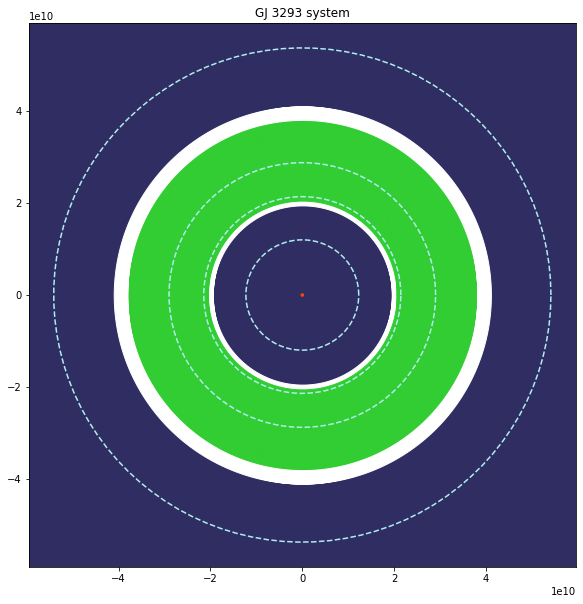

In [7]:
# GJ3293 system

# settin the sun info
solar_luminosity = 10**(GJ3293['Stellar Luminosity [log(Solar)]'][0]) / 3.828*10**(26)
host_name = GJ3293['Host Name'][0]
host_solar_radius = GJ3293['Stellar Radius [Solar Radius]'][0] * 0.00465047 * 1.496e+11
solar_type = GJ3293['Spectral Type'][0]
temp = GJ3293['Stellar Effective Temperature [K]'][0]

# making the star
sun = Star(host_name, solar_type, solar_radius = host_solar_radius, temp = temp, solar_luminosity = solar_luminosity)

# making the system
system_name = str(host_name + ' system')
system = Solar_System(system_name)
system.add_sun(sun)

# making the planets
for i in range(len(GJ3293['Planet Name'])):    
    
    name = GJ3293['Planet Name'][i]
    orbital_period = GJ3293['Orbital Period [days]'][i]
    semimajor_axis = GJ3293['Orbit Semi-Major Axis [au]'][i] * 1.496e+11
    planet_radius = GJ3293['Planet Radius [Earth Radius]'][i]
    eccentricity = GJ3293['Eccentricity'][i]
    
    planet = Planet(name, host_name, orbital_period = orbital_period, semimajor_axis = semimajor_axis, 
                    planet_radius = planet_radius, eccentricity = eccentricity, host_solar_radius = host_solar_radius)
    system.add_planet(planet)
    
# FIXING SOLAR TYPE
for keys in system.get_sun().keys():
    sun.set_solar_type(system.get_sun()[keys].get_solar_type()[0])

# printing the status
system.print_status()
system.plot_system()

HD 23472 b is too close to the star to be habitable
HD 23472 c is too close to the star to be habitable
HD 23472 d is too close to the star to be habitable
HD 23472 e is too close to the star to be habitable
HD 23472 f is too close to the star to be habitable


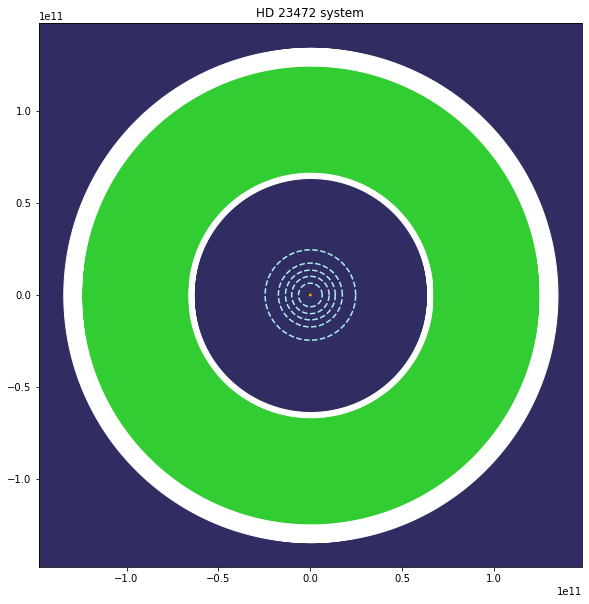

In [8]:
# HD23472 system

# settin the sun info
solar_luminosity = 10**(HD23472['Stellar Luminosity [log(Solar)]'][0]) / 3.828*10**(26)
host_name = HD23472['Host Name'][0]
host_solar_radius = HD23472['Stellar Radius [Solar Radius]'][0] * 0.00465047 * 1.496e+11
solar_type = HD23472['Spectral Type'][0]
temp = HD23472['Stellar Effective Temperature [K]'][0]

# making the star
sun = Star(host_name, solar_type, solar_radius = host_solar_radius, temp = temp, solar_luminosity = solar_luminosity)

# making the system
system_name = str(host_name + ' system')
system = Solar_System(system_name)
system.add_sun(sun)

# making the planets
for i in range(len(HD23472['Planet Name'])):    
    
    name = HD23472['Planet Name'][i]
    orbital_period = HD23472['Orbital Period [days]'][i]
    semimajor_axis = HD23472['Orbit Semi-Major Axis [au]'][i] * 1.496e+11
    planet_radius = HD23472['Planet Radius [Earth Radius]'][i]
    eccentricity = HD23472['Eccentricity'][i]
    
    planet = Planet(name, host_name, orbital_period = orbital_period, semimajor_axis = semimajor_axis, 
                    planet_radius = planet_radius, eccentricity = eccentricity, host_solar_radius = host_solar_radius)
    system.add_planet(planet)
    
# FIXING SOLAR TYPE
for keys in system.get_sun().keys():
    sun.set_solar_type(system.get_sun()[keys].get_solar_type()[0])

# printing the status
system.print_status()
system.plot_system()

TRAPPIST-1 b is too close to the star to be habitable
TRAPPIST-1 c is too close to the star to be habitable
TRAPPIST-1 d is within the habitable zone
TRAPPIST-1 e is within the habitable zone
TRAPPIST-1 f is within the habitable zone
TRAPPIST-1 g is too far from the star to be habitable
TRAPPIST-1 h is too far from the star to be habitable


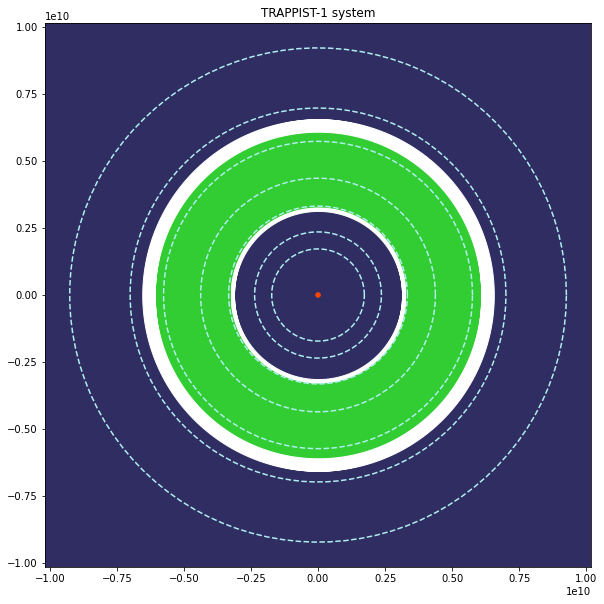

In [9]:
# TRAPPIST1 system

# settin the sun info
solar_luminosity = 10**(TRAPPIST1['Stellar Luminosity [log(Solar)]'][0]) / 3.828*10**(26)
host_name = TRAPPIST1['Host Name'][0]
host_solar_radius = TRAPPIST1['Stellar Radius [Solar Radius]'][0] * 0.00465047 * 1.496e+11
temp = TRAPPIST1['Stellar Effective Temperature [K]'][0]

# making the star
sun = Star(host_name, solar_radius = host_solar_radius, temp = temp, solar_luminosity = solar_luminosity)

# making the system
system_name = str(host_name + ' system')
system = Solar_System(system_name)
system.add_sun(sun)

# making the planets
for i in range(len(TRAPPIST1['Planet Name'])):    
    
    name = TRAPPIST1['Planet Name'][i]
    orbital_period = TRAPPIST1['Orbital Period [days]'][i]
    semimajor_axis = TRAPPIST1['Orbit Semi-Major Axis [au]'][i] * 1.496e+11
    planet_radius = TRAPPIST1['Planet Radius [Earth Radius]'][i]
    eccentricity = TRAPPIST1['Eccentricity'][i]
    
    planet = Planet(name, host_name, orbital_period = orbital_period, semimajor_axis = semimajor_axis, 
                    planet_radius = planet_radius, host_solar_radius = host_solar_radius)
    system.add_planet(planet)

# printing the status
system.print_status()
system.plot_system()